In [114]:
# predicting SAT score from school and student data (NYC)

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("datasets/sat-scores.csv")

# Part 1: Exploratory Data Analysis



In [116]:
for row in df:
  print(f"Feature Name: {row} | Feature Type: {df[row].dtype}")

Feature Name: School ID | Feature Type: object
Feature Name: School Name | Feature Type: object
Feature Name: Borough | Feature Type: object
Feature Name: Building Code | Feature Type: object
Feature Name: Street Address | Feature Type: object
Feature Name: City | Feature Type: object
Feature Name: State | Feature Type: object
Feature Name: Zip Code | Feature Type: int64
Feature Name: Latitude | Feature Type: float64
Feature Name: Longitude | Feature Type: float64
Feature Name: Phone Number | Feature Type: object
Feature Name: Start Time | Feature Type: object
Feature Name: End Time | Feature Type: object
Feature Name: Student Enrollment | Feature Type: float64
Feature Name: Percent White | Feature Type: object
Feature Name: Percent Black | Feature Type: object
Feature Name: Percent Hispanic | Feature Type: object
Feature Name: Percent Asian | Feature Type: object
Feature Name: Average Score (SAT Math) | Feature Type: float64
Feature Name: Average Score (SAT Reading) | Feature Type: fl

In [117]:
print(df.shape)

(435, 22)


In [118]:
print(df.isnull().sum())

School ID                       0
School Name                     0
Borough                         0
Building Code                   0
Street Address                  0
City                            0
State                           0
Zip Code                        0
Latitude                        0
Longitude                       0
Phone Number                    0
Start Time                      4
End Time                        4
Student Enrollment              7
Percent White                   7
Percent Black                   7
Percent Hispanic                7
Percent Asian                   7
Average Score (SAT Math)       60
Average Score (SAT Reading)    60
Average Score (SAT Writing)    60
Percent Tested                 49
dtype: int64


We can see that the null values seem to be spread over a wide range of features, most of which are numerical. This combined with the fact that our dataset is pretty small (only 435 rows) suggests that trying to fill in null values using median or mean could easily produce large skews in the data. Therefore, our data preprocessing will include removing the null values from the dataset.

In [119]:
#binning:
def binning(df, feature):
    l = []
    for x in df[feature]:
        if x>=200 and x<= 400:
            l.append("200-400")
        if x>400 and x<= 600:
            l.append("400-600")
        if x>600 and x<= 800:
            l.append("600-800")
        if str(x) == "nan":
            l.append("None")
    
    return l

<Figure size 144x144 with 0 Axes>

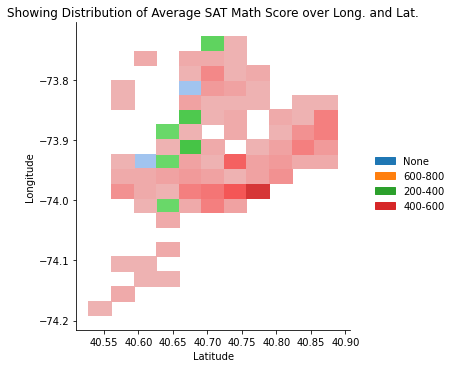

<Figure size 144x144 with 0 Axes>

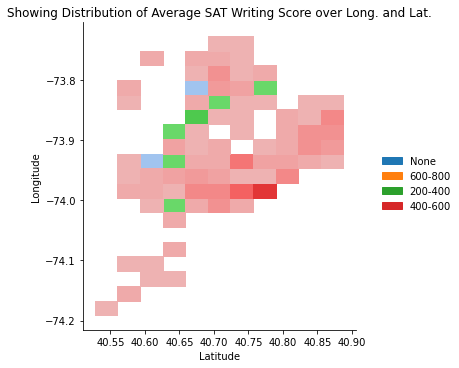

<Figure size 144x144 with 0 Axes>

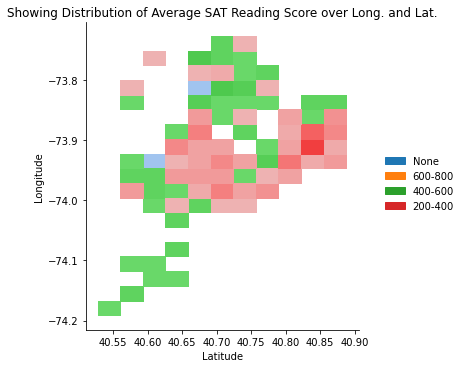

In [120]:
plt.figure(figsize=(2, 2))
sns.displot(df, x="Latitude", y="Longitude", hue=binning(df, "Average Score (SAT Math)"))
plt.title("Showing Distribution of Average SAT Math Score over Long. and Lat.")
plt.show()

plt.figure(figsize=(2, 2))
sns.displot(df, x="Latitude", y="Longitude", hue=binning(df, "Average Score (SAT Writing)"))
plt.title("Showing Distribution of Average SAT Writing Score over Long. and Lat.")
plt.show()

plt.figure(figsize=(2, 2))
sns.displot(df, x="Latitude", y="Longitude", hue=binning(df, "Average Score (SAT Reading)"))
plt.title("Showing Distribution of Average SAT Reading Score over Long. and Lat.")
plt.show()

In [121]:
# reloading the data ith 
df = df.replace('nan', None)

df = df.dropna()

df = df.reset_index()

In [122]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import nltk
nltk.download('stopwords')
# Data is downloaded to /root/nltk_data/corpora/stopwords.zip

from zipfile import ZipFile
file_loc = '/root/nltk_data/corpora/stopwords.zip'
with ZipFile(file_loc, 'r') as z:
  z.extractall('/root/nltk_data/stopwords/')

# data = nltk.corpus.comtrans.aligned_sents('alignment-en-fr.txt')
# print(data[0]) # <AlignedSent: 'Resumption of the se...' -> 'Reprise de la sessio...'>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
def vocabGen(df):

    vocab = {}

    for i in range(df.shape[0]):
    
        tokenizer = RegexpTokenizer(r'\w+')
    
        text_tokens = tokenizer.tokenize(df["School Name"][i])

        tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

        for j in tokens_without_sw:
            if j not in list(vocab.keys()):
                vocab[j] = 0


    for i in list(vocab.keys()):
        count = 0
        for j in range(df.shape[0]):
            if i in df["School Name"][j]:
                vocab[i] += df["Average Score (SAT Math)"][j] + df["Average Score (SAT Reading)"][j] + df["Average Score (SAT Writing)"][j]
                count+=1
        vocab[i] = vocab[i]/count
        
    return vocab
    
    
vocab1 = sorted((value,key) for (key,value) in vocabGen(df).items())

vocab = vocabGen(df)

In [124]:
vocab

{'New': 1310.3,
 'Explorations': 1486.5,
 'Science': 1423.851851851852,
 'Technology': 1264.4166666666667,
 'Math': 1420.8,
 'High': 1293.8341463414633,
 'School': 1287.1122807017543,
 'Essex': 1193.0,
 'Street': 1195.0,
 'Academy': 1216.3647058823528,
 'Lower': 1261.0,
 'Manhattan': 1311.25,
 'Arts': 1246.9714285714285,
 'Dual': 1529.0,
 'Language': 1178.6,
 'Asian': 1529.0,
 'Studies': 1358.2941176470588,
 'Henry': 1197.0,
 'International': 1130.3684210526317,
 'Bard': 1876.5,
 'Early': 1514.7142857142858,
 'College': 1394.9,
 'Urban': 1211.6842105263158,
 'Assembly': 1223.6875,
 'Government': 1196.0,
 'Law': 1213.7272727272727,
 'Marta': 1245.0,
 'Valle': 1245.0,
 'University': 1217.0,
 'Neighborhood': 1144.0,
 'Design': 1222.8,
 'Pace': 1292.0,
 'Health': 1236.7,
 'Professions': 1238.0,
 'Human': 1243.3333333333333,
 'Services': 1327.0,
 'Diplomacy': 1290.0,
 'Union': 1049.0,
 'Square': 1049.0,
 'Institute': 1357.0,
 'Collaborative': 1383.2,
 'Education': 1329.0,
 'Gramercy': 1360.

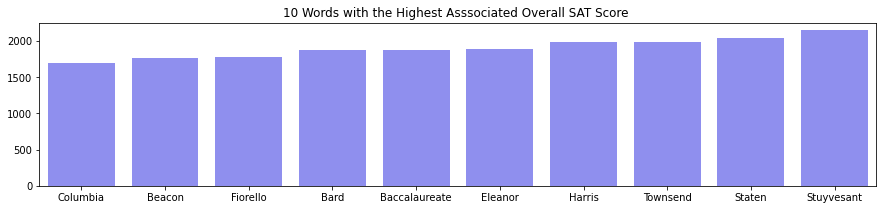

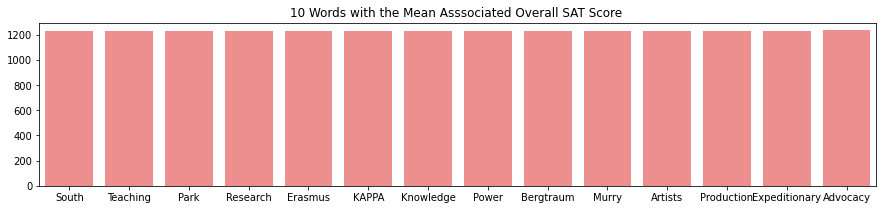

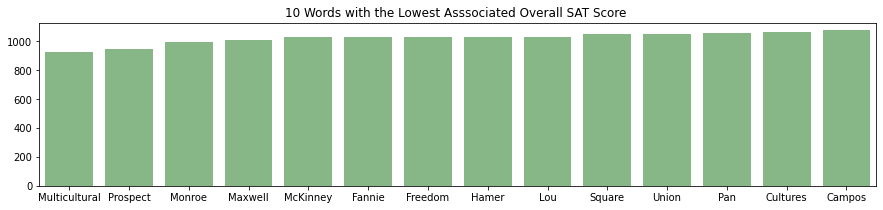

In [125]:
arrs = np.array(vocab1)[434:444,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="blue", alpha=0.5)
plt.title("10 Words with the Highest Asssociated Overall SAT Score ")
plt.show()

arrs = np.array(vocab1)[200:214,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="red", alpha=0.5)
plt.title("10 Words with the Mean Asssociated Overall SAT Score ")
plt.show()

arrs = np.array(vocab1)[0:14,:]
plt.figure(figsize=(15, 3))
sns.barplot(x=arrs[:,1], y=arrs[:,0].astype(float), color="green", alpha=0.5)
plt.title("10 Words with the Lowest Asssociated Overall SAT Score ")
plt.show()

[1157.0, 1226.0, 1327.0]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


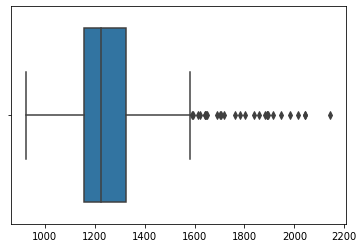

In [126]:
sns.boxplot(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])

a = np.array(df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"])
p = [np.percentile(a, 25), np.percentile(a, 50), np.percentile(a, 75)] 
print(p)

In [127]:
def quartileBin(vocab):

    pWords = {0:[], 1:[], 2:[], 3:[]}

    for i in vocab.keys():
        if float(vocab[i]) < 1157:
            pWords[0].append(i)
        elif float(vocab[i]) >= 1157 and float(vocab[i]) < 1226:
            pWords[1].append(i)
        elif float(vocab[i]) >= 1226 and float(vocab[i]) < 1327:
            pWords[2].append(i)
        elif float(vocab[i]) >= 1327:
            pWords[3].append(i)
            
    return pWords

In [128]:
def oneHotVectors(pWords):

    p0 = []
    p1 = []
    p2 = []
    p3 = []

    for i in range(df.shape[0]):
        if any(item in pWords[0] for item in df["School Name"][i].split(" ")):
            p0.append(1)
        else:
            p0.append(0)
        if any(item in pWords[1] for item in df["School Name"][i].split(" ")):
            p1.append(1)
        else:
            p1.append(0)
        if any(item in pWords[2] for item in df["School Name"][i].split(" ")):
            p2.append(1)
        else:
            p2.append(0)
        if any(item in pWords[3] for item in df["School Name"][i].split(" ")):
            p3.append(1)
        else:
            p3.append(0)
            
    return p0, p1, p2, p3

In [129]:
p0, p1, p2, p3 = oneHotVectors(quartileBin(vocab))

df["p0"] = p0
df["p1"] = p1
df["p2"] = p2
df["p3"] = p3

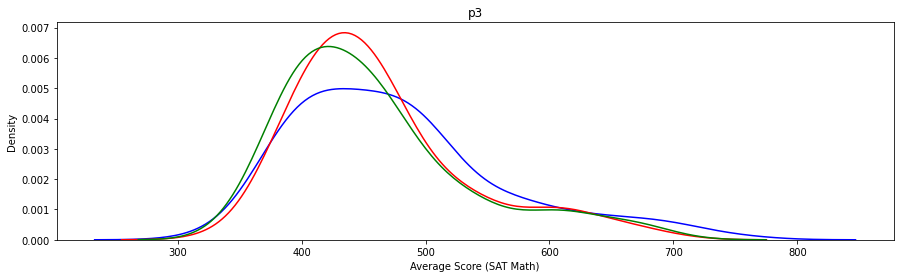

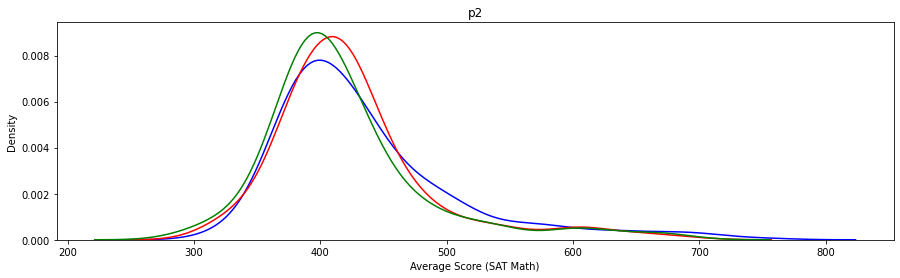

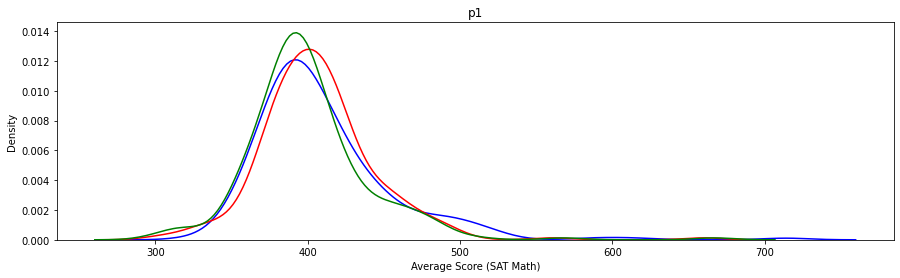

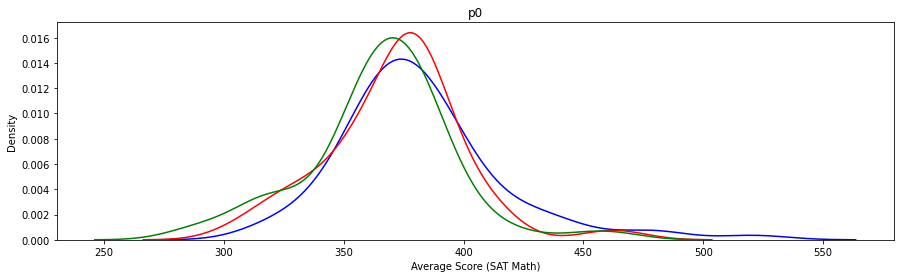

In [130]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p3']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p3']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p3']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p3")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p2']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p2']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p2']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p2")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p1']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p1']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p1']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p1")
plt.show()

plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p0']==1]['Average Score (SAT Math)'], color = "blue")
sns.kdeplot(df[df['p0']==1]['Average Score (SAT Reading)'], color="red")
sns.kdeplot(df[df['p0']==1]['Average Score (SAT Writing)'], color="green")
plt.title("p0")
plt.show()
    

In [131]:
def sumSAT(df):

    totalScore = df["Average Score (SAT Math)"] + df["Average Score (SAT Reading)"] + df["Average Score (SAT Writing)"]
    
    return totalScore

df["totalScore"] = sumSAT(df)

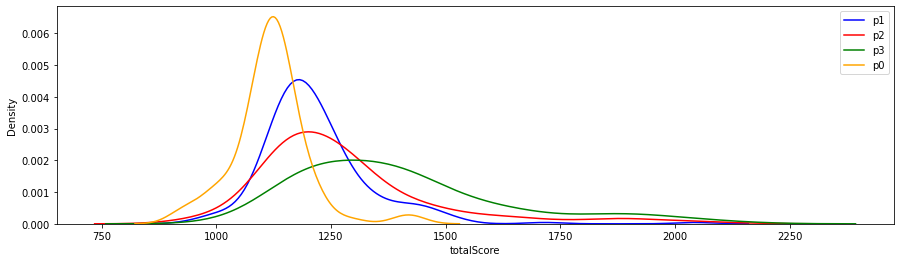

In [132]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p1']==1]['totalScore'], color = "blue", label="p1")
sns.kdeplot(df[df['p2']==1]['totalScore'], color="red", label="p2")
sns.kdeplot(df[df['p3']==1]['totalScore'], color="green", label="p3")
sns.kdeplot(df[df['p0']==1]['totalScore'], color="orange", label="p0")
plt.legend()
plt.show()

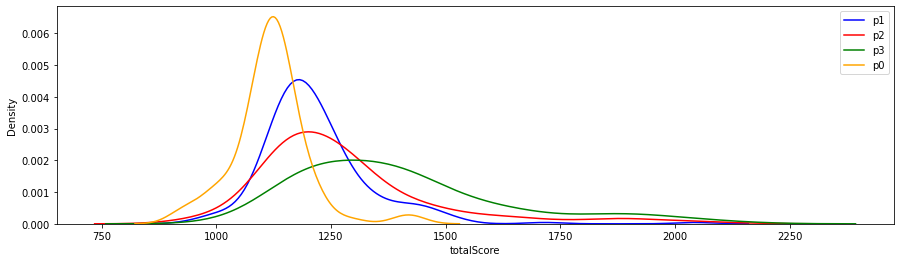

In [133]:
plt.figure(figsize=(15, 4))
sns.kdeplot(df[df['p1']==1]['totalScore'], color = "blue", label="p1")
sns.kdeplot(df[df['p2']==1]['totalScore'], color="red", label="p2")
sns.kdeplot(df[df['p3']==1]['totalScore'], color="green", label="p3")
sns.kdeplot(df[df['p0']==1]['totalScore'], color="orange", label="p0")
plt.legend()
plt.show()

In [134]:
#Formatting percentage

def removePercentage(df):
    newdf = [] 
    for i in df:
        newdf.append(float(i.split("%")[0]))
        
    return newdf

df["Percent Tested"] = removePercentage(df["Percent Tested"])
    

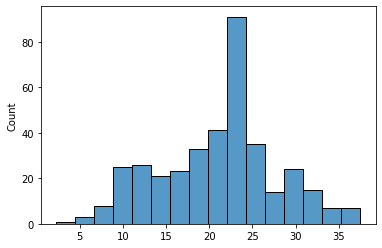

In [135]:
import statistics

def vary(df):

    variance = []

    for x in range(len(df["Percent White"])):
        cols = ["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]
        l = []
        for y in cols:
            l.append(float(str(df.at[x, y]).replace("%", "")))
    
        norm = 100/len(l)
        newl = []
        for z in l:
            newl.append(abs(norm-z))
    
        variance.append(statistics.mean(newl))
        
    return variance

sns.histplot(x=vary(df))
plt.show()
    
df["diversityIndex"] = vary(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


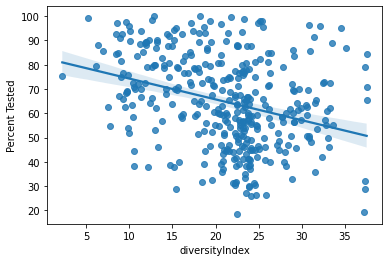

In [136]:
df["diversityIndex"] = vary(df)

sns.regplot(df["diversityIndex"], df["Percent Tested"])

In [137]:
def time(df):
    slist = [] 
    elist = []
    for i in range(len(df["Start Time"])):
        i = df["Start Time"][i]
        i = i.split(" ")
        if i[1] == "AM":
            i = i[0].split(":")
            slist.append(int(i[0]+i[1]))
        elif i[1] == "PM":
            i = i[0].split(":")
            slist.append(int(i[0]+i[1])+1200)
    for i in range(len(df["End Time"])):
        i = df["End Time"][i]
        i = i.split(" ")
        if i[1] == "AM":
            i = i[0].split(":")
            elist.append(int(i[0]+i[1]))
        elif i[1] == "PM":
            i = i[0].split(":")
            elist.append(int(i[0]+i[1])+1200)
    slist = np.array(slist)
    elist = np.array(elist)
    difflist = elist-slist
                         
    return difflist

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


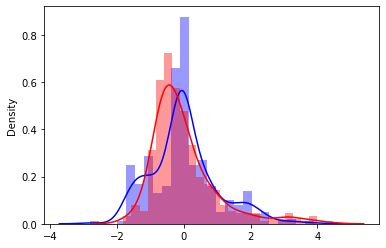

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sns.distplot(scaler.fit_transform(time(df).reshape(-1,1)), color="blue")
sns.distplot(scaler.fit_transform(np.array(df["totalScore"]).reshape(-1,1)), color="red")
plt.show()

In [139]:
df["time"] = time(df)

# Part 2: Preprocessing Data & Model Training

In [140]:
df

,index,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,...,Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,p0,p1,p2,p3,totalScore,diversityIndex,time
0,2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,...,601.0,601.0,91.0,0,0,1,1,1859.0,8.950,785
1,3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,411.0,387.0,78.9,0,1,0,0,1193.0,15.550,645
2,4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,428.0,415.0,65.1,0,1,1,0,1261.0,18.350,670
3,5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,...,453.0,463.0,95.9,0,1,1,1,1529.0,32.150,735
4,6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,...,406.0,381.0,59.7,1,1,1,1,1197.0,16.275,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,...,362.0,352.0,44.6,0,0,1,1,1086.0,21.600,865
370,431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,...,381.0,376.0,38.5,1,1,1,0,1114.0,14.675,685
371,432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,...,430.0,423.0,76.6,0,0,1,0,1280.0,16.400,689
372,433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,...,403.0,405.0,46.5,0,1,1,0,1207.0,19.325,790


In [141]:
from sklearn import preprocessing

In [142]:
feature_df = df

# deleting features we don't need
del feature_df["School ID"]
del feature_df["School Name"]
del feature_df["Building Code"]
del feature_df["Street Address"]
del feature_df["City"]
del feature_df["State"]
del feature_df["Zip Code"]
del feature_df["Phone Number"]
del feature_df["Start Time"]
del feature_df["End Time"]
del feature_df["Percent White"]
del feature_df["Percent Black"]
del feature_df["Percent Hispanic"]
del feature_df["Percent Asian"]

# we also want to delete the constituent SAT scores as they are too highly correlated
# with the target (Total SAT Score) and inhibit the exploration of the effects of other features
del feature_df["Average Score (SAT Math)"]
del feature_df["Average Score (SAT Reading)"]
del feature_df["Average Score (SAT Writing)"]
del feature_df["index"]

In [143]:
feature_df

,Borough,Latitude,Longitude,Student Enrollment,Percent Tested,p0,p1,p2,p3,totalScore,diversityIndex,time
0,Manhattan,40.71873,-73.97943,1735.0,91.0,0,0,1,1,1859.0,8.950,785
1,Manhattan,40.71687,-73.98953,358.0,78.9,0,1,0,0,1193.0,15.550,645
2,Manhattan,40.71687,-73.98953,383.0,65.1,0,1,1,0,1261.0,18.350,670
3,Manhattan,40.71687,-73.98953,416.0,95.9,0,1,1,1,1529.0,32.150,735
4,Manhattan,40.71376,-73.98526,255.0,59.7,1,1,1,1,1197.0,16.275,700
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Queens,40.60199,-73.76283,381.0,44.6,0,0,1,1,1086.0,21.600,865
370,Queens,40.58601,-73.82309,368.0,38.5,1,1,1,0,1114.0,14.675,685
371,Queens,40.58601,-73.82309,683.0,76.6,0,0,1,0,1280.0,16.400,689
372,Queens,40.58601,-73.82309,397.0,46.5,0,1,1,0,1207.0,19.325,790


In [144]:
# encoding categorical data (Borough)

le = preprocessing.LabelEncoder()
le.fit(["Manhattan", "Bronx", "Queens", "Brooklyn", "Staten Island"])
feature_df["Borough"] = le.transform(feature_df["Borough"])
feature_df["Borough"]

0      2
1      2
2      2
3      2
4      2
      ..
369    3
370    3
371    3
372    3
373    3
Name: Borough, Length: 374, dtype: int64

In [145]:
# normalizing the data

from sklearn.preprocessing import MinMaxScaler

def normalize(data):
    scaler = MinMaxScaler()
    
    for i in list(data.columns):
        data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))
    
    
    return data

feature_df = normalize(feature_df)

feature_df.head(5)

,Borough,Latitude,Longitude,Student Enrollment,Percent Tested,p0,p1,p2,p3,totalScore,diversityIndex,time
0,0.5,0.528961,0.457226,0.300283,0.889571,0.0,0.0,1.0,1.0,0.766393,0.190071,0.666667
1,0.5,0.523796,0.435517,0.040716,0.741104,0.0,1.0,0.0,0.0,0.220492,0.377305,0.260870
2,0.5,0.523796,0.435517,0.045429,0.571779,0.0,1.0,1.0,0.0,0.276230,0.456738,0.333333
3,0.5,0.523796,0.435517,0.051649,0.949693,0.0,1.0,1.0,1.0,0.495902,0.848227,0.521739
4,0.5,0.515161,0.444695,0.021301,0.505521,1.0,1.0,1.0,1.0,0.223770,0.397872,0.420290


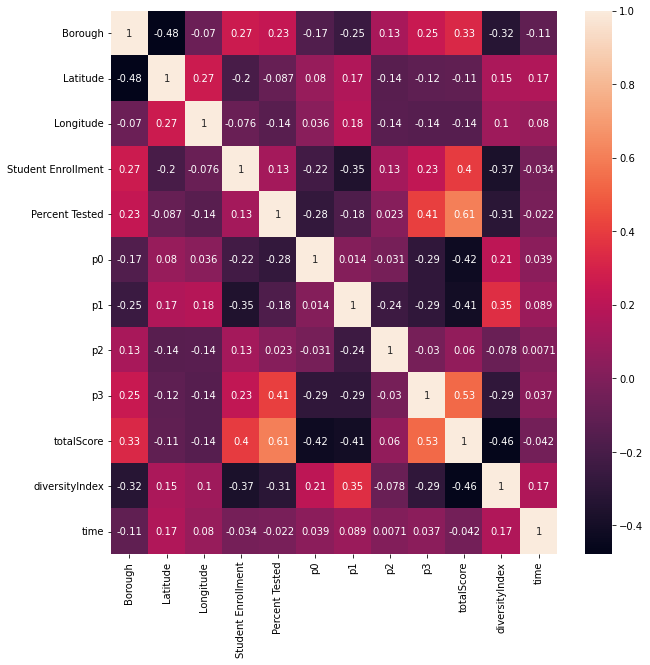

In [146]:
plt.figure(figsize=(10, 10))
sns.heatmap(feature_df.corr(), annot=True)

In [147]:
import sklearn.model_selection as sk 

targets = feature_df["totalScore"]

feature_df.drop('totalScore', axis=1, inplace=True)

X_train,X_val,Y_train,Y_val = sk.train_test_split(df,targets,test_size = 0.1,random_state = 42, shuffle=True)

print(X_train.shape)

(336, 11)


In [148]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor


#Linear Support Vector Machine
model1 = sklearn.svm.SVR(kernel='linear', degree=2)
model1.fit(X_train, Y_train)
preds1 = model1.predict(X_val)


#Gaussian Support Vector Machine
model2 = sklearn.svm.SVR(kernel='rbf', degree=2)
model2.fit(X_train, Y_train)
preds2 = model2.predict(X_val)

#Ridge Regression
model3 = sklearn.linear_model.Ridge(alpha=1.0)
model3.fit(X_train, Y_train)
preds3 = model3.predict(X_val)

#Linear Regression
model4 = sklearn.linear_model.LinearRegression()
model4.fit(X_train, Y_train)
preds4 = model4.predict(X_val)

#Random Forest Regressor
model5 = RandomForestRegressor(n_estimators=15, random_state=1)
model5.fit(X_train, Y_train)
preds5 = model5.predict(X_val)

#K Neighbour Regressor
model6 = KNeighborsRegressor()
model6.fit(X_train, Y_train)
preds6 = model6.predict(X_val)

#Ensemble Regressor:

er = VotingRegressor([('RDG', model3), ('LR', model4), ("RFR", model5)])
predsER = er.fit(X_train, Y_train).predict(X_val)



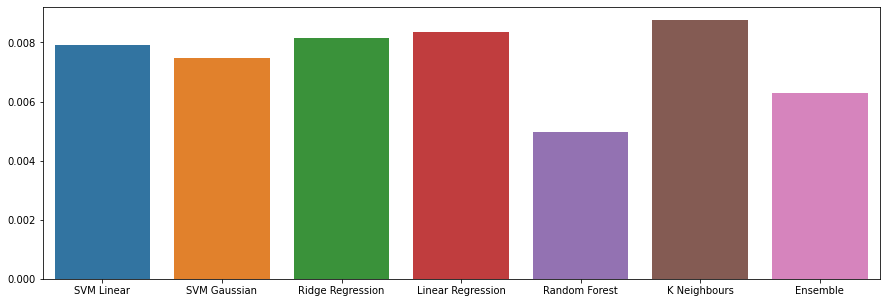

In [149]:
a = [np.sum(np.power((np.array(preds1)-np.array(Y_val)),2))/len(preds1),
     np.sum(np.power((np.array(preds2)-np.array(Y_val)),2))/len(preds2),
     np.sum(np.power((np.array(preds3)-np.array(Y_val)),2))/len(preds3),
     np.sum(np.power((np.array(preds4)-np.array(Y_val)),2))/len(preds4),
     np.sum(np.power((np.array(preds5)-np.array(Y_val)),2))/len(preds5),
     np.sum(np.power((np.array(preds6)-np.array(Y_val)),2))/len(preds6),
     np.sum(np.power((np.array(predsER)-np.array(Y_val)),2))/len(predsER)]

l = ["SVM Linear", "SVM Gaussian", "Ridge Regression", "Linear Regression", "Random Forest", "K Neighbours", "Ensemble"]

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=l, y=a)
plt.show()

In [150]:
# evaluating the performance of trained models

In [155]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score
# Calculate the performance of this model
# score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
# print(score)

In [167]:
score = performance_metric(Y_val, preds5)
print(score)

0.775314025805677


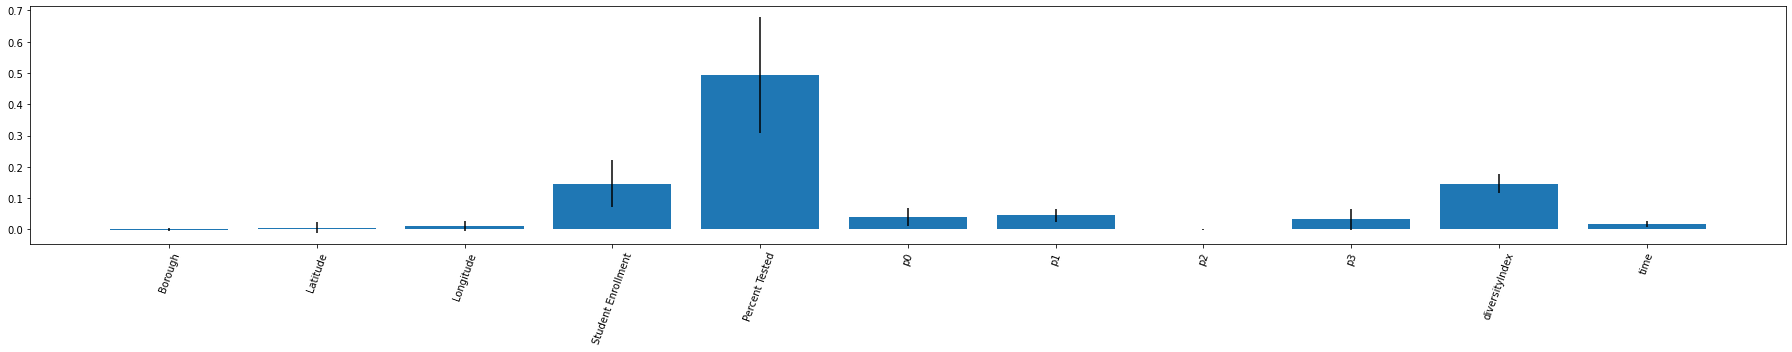

In [152]:
#Random Forest (Sample for Lowest Error without Ensemble)

from sklearn.inspection import permutation_importance

result = permutation_importance(model5, X_val, Y_val, n_repeats=10, random_state=42, n_jobs=2)

m = []
n = []

for i,j in enumerate(result.importances_mean):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
plt.bar(x=m,height=n, yerr=result.importances_std)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


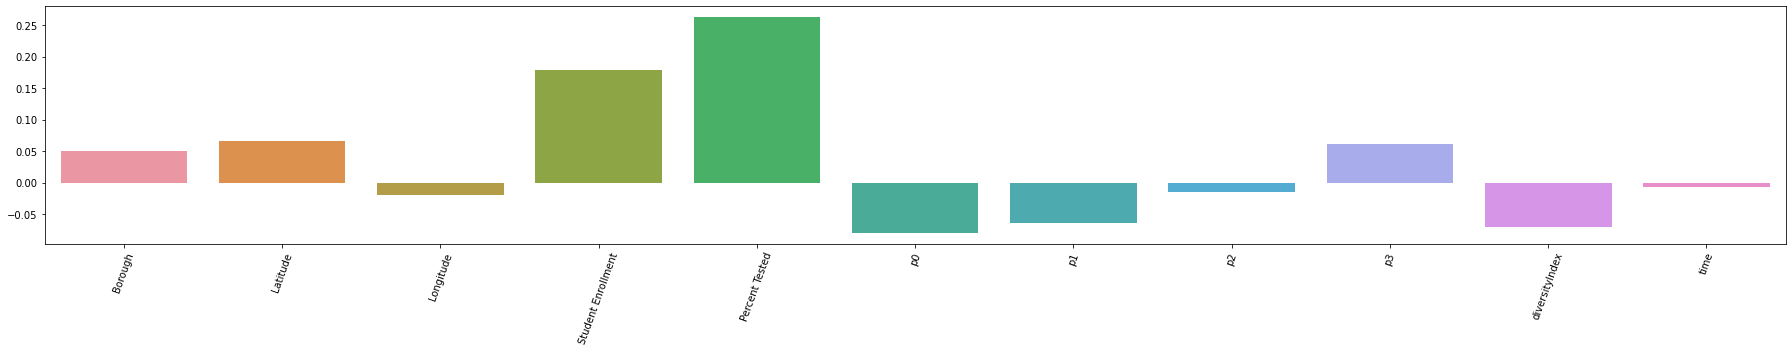

In [168]:
# Linear Regression (Sample For High Error)

importance = model4.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


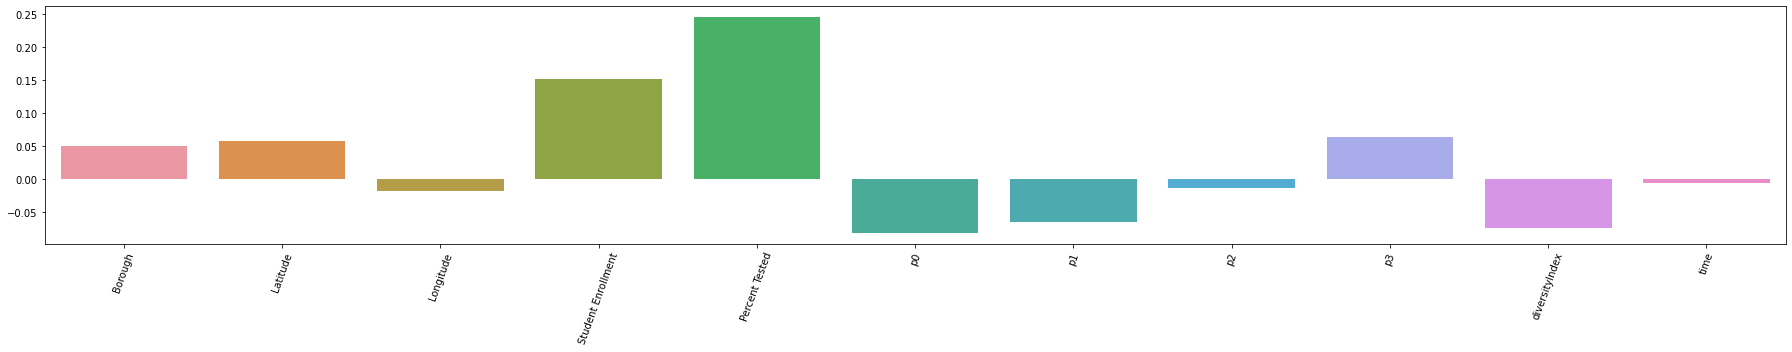

In [169]:
# Ridge Regression (Sample for Higher Error)
importance = model3.coef_

m = []
n = []

for i,j in enumerate(importance):
    m.append(df.columns[i])
    n.append(j)

plt.figure(figsize=(25, 5))
sns.barplot(m,n)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [170]:
df

,Borough,Latitude,Longitude,Student Enrollment,Percent Tested,p0,p1,p2,p3,diversityIndex,time
0,0.50,0.528961,0.457226,0.300283,0.889571,0.0,0.0,1.0,1.0,0.190071,0.666667
1,0.50,0.523796,0.435517,0.040716,0.741104,0.0,1.0,0.0,0.0,0.377305,0.260870
2,0.50,0.523796,0.435517,0.045429,0.571779,0.0,1.0,1.0,0.0,0.456738,0.333333
3,0.50,0.523796,0.435517,0.051649,0.949693,0.0,1.0,1.0,1.0,0.848227,0.521739
4,0.50,0.515161,0.444695,0.021301,0.505521,1.0,1.0,1.0,1.0,0.397872,0.420290
...,...,...,...,...,...,...,...,...,...,...,...
369,0.75,0.204809,0.922793,0.045052,0.320245,0.0,0.0,1.0,1.0,0.548936,0.898551
370,0.75,0.160438,0.793268,0.042601,0.245399,1.0,1.0,1.0,0.0,0.352482,0.376812
371,0.75,0.160438,0.793268,0.101979,0.712883,0.0,0.0,1.0,0.0,0.401418,0.388406
372,0.75,0.160438,0.793268,0.048068,0.343558,0.0,1.0,1.0,0.0,0.484397,0.681159
